In [1]:
import pandas as pd
import helpers
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import my_functions as me # Library with functions created for the project
import statsmodels.formula.api as smf
import random

ModuleNotFoundError: No module named 'my_functions'

### 1. Loading data

In [2]:
# Defining the data folders

DATA_FOLDER = 'data/'
BA_FOLDER = DATA_FOLDER + 'BeerAdvocate/'

In [3]:
# load data from csv file to dataframes
BA_users_raw = pd.read_csv(BA_FOLDER + 'users.csv')
BA_breweries_raw = pd.read_csv(BA_FOLDER + 'breweries.csv')
BA_beers_raw = pd.read_csv(BA_FOLDER + 'beers.csv')
BA_groups_raw = pd.read_csv(DATA_FOLDER + 'BA_groups.csv')

# parse the ratings file to dataframe without textual description
BA_ratings_raw = helpers.parse_reviews(BA_FOLDER + 'ratings.txt','./data/RateBeer')

# convert joined column to datetime
BA_users_raw['joined'] = pd.to_datetime(BA_users_raw['joined'], unit='s')

FileNotFoundError: [Errno 2] No such file or directory: 'data/BeerAdvocate/users.csv'

Display obtained dataframes

In [6]:
BA_breweries_raw.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [7]:
BA_beers_raw.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [8]:
BA_users_raw.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,2008-01-07 11:00:00,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,2007-10-08 10:00:00,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,2005-05-18 10:00:00,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,2004-11-25 11:00:00,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,2003-11-20 11:00:00,Northern Ireland


In [9]:
BA_ratings_raw.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating
0,Stoudt's Blonde Double MaiBock,9906,Stoudts Brewing Co.,394,Maibock / Helles Bock,7.0,2009-04-27 10:00:00,atsprings,atsprings.94142,3.5,3.5,4.0,3.5,4.0,3.65
1,Stoudt's Blonde Double MaiBock,9906,Stoudts Brewing Co.,394,Maibock / Helles Bock,7.0,2009-04-19 10:00:00,tr4nc3d,tr4nc3d.232958,4.0,4.0,4.0,4.0,4.0,4.00
2,Stoudt's Blonde Double MaiBock,9906,Stoudts Brewing Co.,394,Maibock / Helles Bock,7.0,2009-04-07 10:00:00,Jayli,jayli.193663,4.0,3.5,4.0,4.0,4.0,3.88
3,Stoudt's Blonde Double MaiBock,9906,Stoudts Brewing Co.,394,Maibock / Helles Bock,7.0,2009-04-02 10:00:00,TheManiacalOne,themaniacalone.37950,4.0,4.0,4.0,4.5,4.5,4.30
4,Stoudt's Blonde Double MaiBock,9906,Stoudts Brewing Co.,394,Maibock / Helles Bock,7.0,2009-03-31 10:00:00,BARFLYB,barflyb.181122,4.0,3.0,4.0,4.5,4.0,3.96


In [10]:
BA_groups_raw.head()

,Unnamed: 0,year,brewery_name,group,main_group
0,0,2004,Companhia Cervejaria Brahma,Inbev,InBev
1,1,2004,Apatinska Pivara A.D.,Inbev,InBev
2,2,2004,Arcense Stoombierbouwerij (Hertog Jan Brouwerij),Inbev,InBev
3,3,2004,Brasserie Belle-Vue,Inbev,InBev
4,4,2004,Bergenbier SA,Inbev,InBev


### 2. Sanity Check

Check how many NaN values are present in every column and try to deal with them.

#### a) Breweries

In [11]:
print(BA_breweries_raw.isna().mean())

id           0.0
location     0.0
name         0.0
nbr_beers    0.0
dtype: float64


In [12]:
BA_breweries = BA_breweries_raw

#### b) Users

In [13]:
print(BA_users_raw.isna().mean())

nbr_ratings    0.000000
nbr_reviews    0.000000
user_id        0.000000
user_name      0.000007
joined         0.017254
location       0.203502
dtype: float64


We want to check if missing data about location are equally distributed across all years.

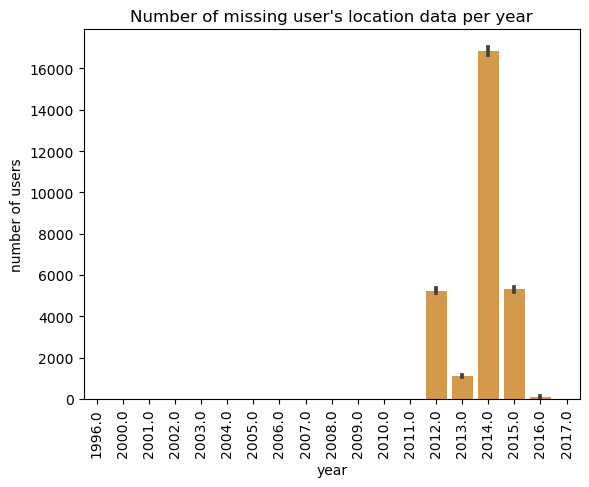

In [14]:
missing_location_by_joined_year = BA_users_raw.loc[:, ['joined', 'location']]
missing_location_by_joined_year['location'] = pd.isna(missing_location_by_joined_year['location']).astype('int')
missing_location_by_joined_year['joined'] = missing_location_by_joined_year['joined'].dt.year
sns.barplot(missing_location_by_joined_year, y='location', x='joined', estimator='sum', color='#eb9e34')
plt.title("Number of missing user's location data per year")
plt.xlabel('year')
plt.ylabel('number of users')
plt.xticks(rotation=90)
plt.show()

We noticed that after 2012 there are more missing locations that before.

In [15]:
# drop the value without joined time - as there are only 1.7 % of such user
BA_users = BA_users_raw.dropna(subset='joined').copy()

# change Nan values to undefined label - as removing them from dataset will result in big information loss
BA_users = BA_users.fillna('Undefined')

#### c) Beers

In [16]:
print(BA_beers_raw.isna().mean())

beer_id                      0.000000
beer_name                    0.000000
brewery_id                   0.000000
brewery_name                 0.000000
style                        0.000000
nbr_ratings                  0.000000
nbr_reviews                  0.000000
avg                          0.116903
ba_score                     0.782069
bros_score                   0.979695
abv                          0.128280
avg_computed                 0.116946
zscore                       0.856547
nbr_matched_valid_ratings    0.000000
avg_matched_valid_ratings    0.899324
dtype: float64


Many values are missing in ba_score and bros_score column. In fact, those scores are only calculated for beers that have more than 10 ratings. We decided to check how many ratings refer to beers with and without overall_score defined. 

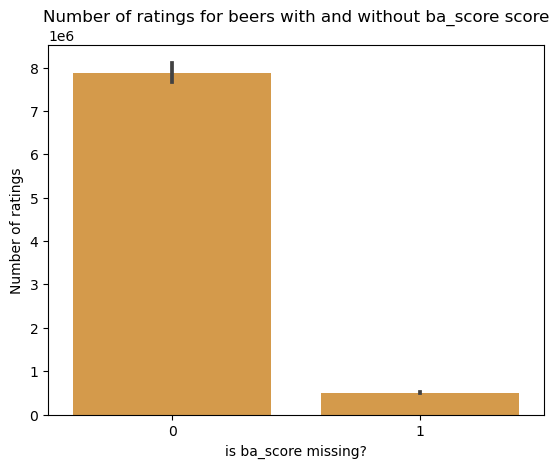

In [17]:
sns.barplot(BA_beers_raw, estimator='sum', x=pd.isna(BA_beers_raw['ba_score']).astype('int'), y='nbr_ratings', color='#eb9e34')
plt.xlabel("is ba_score missing?")
plt.ylabel('Number of ratings')
plt.title('Number of ratings for beers with and without ba_score score')
plt.show()

Although there are fewer then 25% of beers with defined ba_score in the dataset, there are many more ratings concerning them as they are the most popular. Because of that fact we decided not to remove those values but encode missing values with -1. 

In [18]:
# removing columns with more than 90% of missing values
BA_beers = BA_beers_raw.drop(['zscore', 'avg_matched_valid_ratings'], axis=1).copy()

# removing beers that have 0 reviews
BA_beers = BA_beers[BA_beers['nbr_ratings'] > 0]

print(BA_beers.isna().mean())

beer_id                      0.000000
beer_name                    0.000000
brewery_id                   0.000000
brewery_name                 0.000000
style                        0.000000
nbr_ratings                  0.000000
nbr_reviews                  0.000000
avg                          0.000000
ba_score                     0.753212
bros_score                   0.977006
abv                          0.124505
avg_computed                 0.000000
nbr_matched_valid_ratings    0.000000
dtype: float64


In [19]:
# encode remaining NaNs in overall_score and style_score with 
BA_beers = BA_beers.fillna(-1)

#### d) Ratings

In [20]:
print(BA_ratings_raw.isna().mean())

beer_name       0.00000
beer_id         0.00000
brewery_name    0.00000
brewery_id      0.00000
style           0.00000
abv             0.02041
date            0.00000
user_name       0.00000
user_id         0.00000
appearance      0.43171
aroma           0.43171
palate          0.43171
taste           0.43171
overall         0.43171
rating          0.00000
dtype: float64


In [21]:
# dropping row with missing information about abv
BA_ratings = BA_ratings_raw.dropna(subset='abv').copy()

#### e) Groups

In [22]:
print(BA_groups_raw.isna().mean())

Unnamed: 0      0.0
year            0.0
brewery_name    0.0
group           0.0
main_group      0.0
dtype: float64


In [23]:
BA_groups = BA_groups_raw.drop(columns=['Unnamed: 0' ])

### 3. Dataframe merging

In [24]:
# merge beers df with location of brewery that brewed them
BA_beers_with_brewery_location = BA_beers.merge(BA_breweries[['location', 'id']], left_on='brewery_id', right_on='id', how='left')

# print columns of resulting df with percentage of missing values in each
print(BA_beers_with_brewery_location.isna().mean())

beer_id                      0.0
beer_name                    0.0
brewery_id                   0.0
brewery_name                 0.0
style                        0.0
nbr_ratings                  0.0
nbr_reviews                  0.0
avg                          0.0
ba_score                     0.0
bros_score                   0.0
abv                          0.0
avg_computed                 0.0
nbr_matched_valid_ratings    0.0
location                     0.0
id                           0.0
dtype: float64


In [25]:
# merge ratings df with group that produced rated beer (currently only AB InBev) based on brewery name and year of review
BA_ratings_with_groups = BA_ratings.merge(BA_groups,left_on=['brewery_name', BA_ratings['date'].apply(lambda x: x.year)],
                                                    right_on=['brewery_name', 'year'],
                                                    how='left')

# replace name of group for other beers
BA_ratings_with_groups['group'] = BA_ratings_with_groups['group'].fillna('Other')
BA_ratings_with_groups['main_group'] = BA_ratings_with_groups['main_group'].fillna('Other')
BA_ratings_with_groups = BA_ratings_with_groups.dropna(subset= ['overall','appearance', 'taste', 'aroma', 'palate'])

# print columns of resulting df with percentage of missing values in each
print(BA_ratings_with_groups.isna().mean())

beer_name       0.0
beer_id         0.0
brewery_name    0.0
brewery_id      0.0
style           0.0
abv             0.0
date            0.0
user_name       0.0
user_id         0.0
appearance      0.0
aroma           0.0
palate          0.0
taste           0.0
overall         0.0
rating          0.0
year            0.0
group           0.0
main_group      0.0
dtype: float64


In [26]:
# merge ratings_group df with information about users
BA_ratings_with_groups_and_users = BA_ratings_with_groups.merge(BA_users[['joined', 'location', 'nbr_ratings', 'user_id']], on='user_id')
BA_ratings_with_groups_and_users = BA_ratings_with_groups_and_users.rename(columns={
    'nbr_ratings': 'total_user_nbr_ratings',
    'location': 'user_location',
    'joined': 'user_joined'
    })

# print columns of resulting df with percentage of missing values in each
print(BA_ratings_with_groups_and_users.isna().mean())

beer_name                 0.0
beer_id                   0.0
brewery_name              0.0
brewery_id                0.0
style                     0.0
abv                       0.0
date                      0.0
user_name                 0.0
user_id                   0.0
appearance                0.0
aroma                     0.0
palate                    0.0
taste                     0.0
overall                   0.0
rating                    0.0
year                      0.0
group                     0.0
main_group                0.0
user_joined               0.0
user_location             0.0
total_user_nbr_ratings    0.0
dtype: float64


In [27]:
# inner merge breweries with groups owning them
# equivalent to selecting only InBev breweries from dataset
BA_group_breweries = BA_breweries.merge(BA_groups, left_on='name', right_on='brewery_name') 

### 4. Datasets exploration

#### a. Breweries

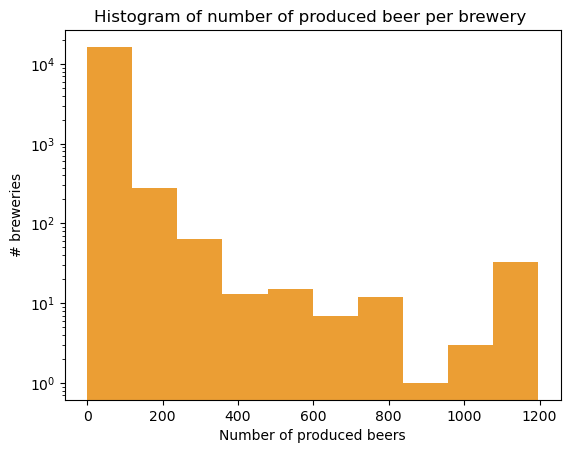

In [26]:
plt.hist(x=BA_breweries['nbr_beers'], color='#eb9e34')
plt.yscale('log')
plt.title('Histogram of number of produced beer per brewery ')
plt.xlabel('Number of produced beers')
plt.ylabel('# breweries')
plt.show()

To obtain a reasonable plot we have to set log-scale on y-axis. The distribution is heavily right skewed, following a power law. It means that there are many breweries that produce only a few kind of beers and there are some that produce a lot.   

In [27]:
# print top 10 locations based on number of breweries
BA_breweries.groupby('location')['id'].count().sort_values(ascending=False).head(10)

location
Germany                      1431
England                       997
United States, California     929
Canada                        775
United States, Washington     411
United States, New York       406
United States, Colorado       404
France                        402
Australia                     401
Italy                         369
Name: id, dtype: int64

In [28]:
# print top 10 locations based on number of produced beers
BA_breweries.groupby('location')['nbr_beers'].sum().sort_values(ascending=False).head(10)

location
United States, California       35587
United States, Pennsylvania     22710
United States, Colorado         18181
Canada                          16372
United States, Illinois         14993
United States, New York         13179
United States, Oregon           11973
United States, Florida          11415
United States, Washington       10786
United States, Massachusetts    10507
Name: nbr_beers, dtype: int64

It seems interesting that in some states there are so many different beers types, despite them not being in the top 10 based on number of breweries.

In [29]:
print(scipy.stats.pearsonr(BA_breweries.groupby('location')['nbr_beers'].sum(), BA_breweries.groupby('location')['id'].count()))

PearsonRResult(statistic=0.7192204578046338, pvalue=1.424810416000745e-48)


But correlation between the number of breweries and the number of different beer types produced is strong, which seems very intuitive.

#### b. Beers

In [30]:
BA_beers_with_brewery_location.describe()

,beer_id,brewery_id,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,nbr_matched_valid_ratings,id
count,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000
mean,143980.462655,20485.831883,33.845327,10.442637,3.721189,20.133272,0.973002,5.602292,3.717594,1.165508,20485.831883
std,84111.328529,15188.054822,245.558727,73.197759,0.475414,36.975060,12.959274,3.158204,0.464248,18.400635,15188.054822
min,3.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000
25%,72591.250000,3273.000000,1.000000,0.000000,3.500000,-1.000000,-1.000000,4.700000,3.500000,0.000000,3273.000000
50%,138899.500000,22618.000000,3.000000,1.000000,3.780000,-1.000000,-1.000000,5.800000,3.770000,0.000000,22618.000000
75%,217918.750000,33103.000000,9.000000,3.000000,4.010000,-1.000000,-1.000000,7.200000,4.000000,0.000000,33103.000000
max,293296.000000,49815.000000,16509.000000,3899.000000,5.000000,100.000000,100.000000,67.500000,5.000000,2968.000000,49815.000000


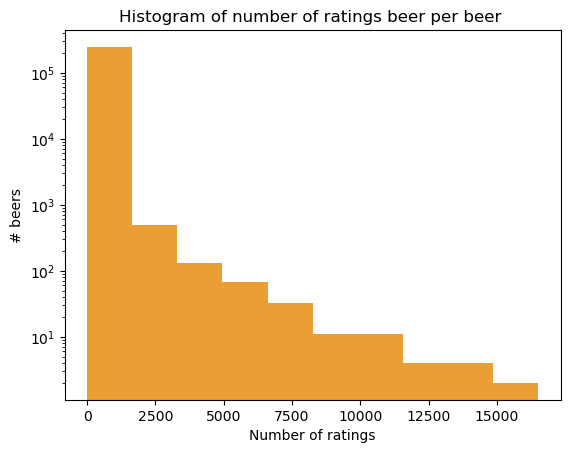

In [31]:
plt.hist(BA_beers_with_brewery_location['nbr_ratings'], color='#eb9e34')
plt.yscale('log')
plt.title('Histogram of number of ratings beer per beer ')
plt.xlabel('Number of ratings')
plt.ylabel('# beers')
plt.show()

Distribution of number of ratings per beer is also right skewed and must be ploted on chart with log y-axis. There are many beers with only few ratings and some beers with a large number (up to 15000). 

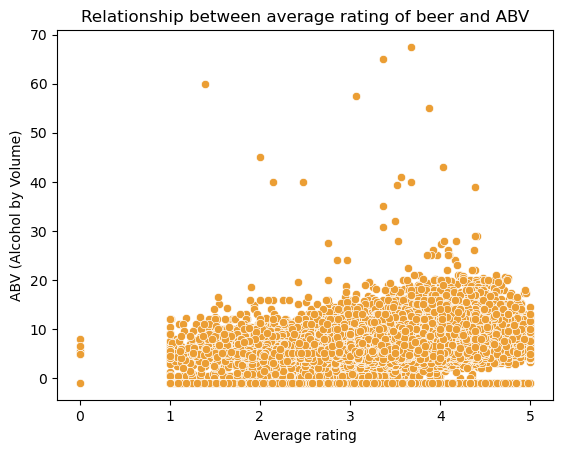

In [32]:
# plot the relationship between ABV and average rating for all beers
sns.scatterplot(BA_beers_with_brewery_location, x='avg', y='abv', color='#eb9e34')
plt.title('Relationship between average rating of beer and ABV')
plt.xlabel('Average rating')
plt.ylabel('ABV (Alcohol by Volume)')
plt.show()

In [33]:
scipy.stats.pearsonr(BA_beers_with_brewery_location['abv'], BA_beers_with_brewery_location['avg'])

PearsonRResult(statistic=0.2106111784400225, pvalue=0.0)

The correlation between ABV and rating of the beer is positive but weak. It is visible also in the scatterplot.

#### c. Users

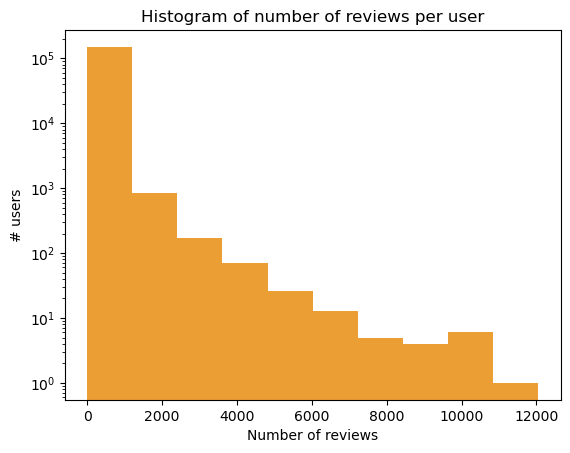

In [34]:
plt.hist(x=BA_users['nbr_ratings'], color='#eb9e34')
plt.yscale('log')
plt.title('Histogram of number of reviews per user')
plt.xlabel('Number of reviews')
plt.ylabel('# users')
plt.yscale('log')

In [35]:
# users by location
print(BA_users.groupby('location')['user_id'].count().sort_values(ascending=False).head(10), '\n\n')
users_from_USA = len(BA_users[BA_users['location'].str.contains('United States')])


location
Undefined                       28627
United States, California       11638
United States, Pennsylvania      8689
United States, New York          7432
United States, Illinois          6866
United States, Massachusetts     6658
United States, Texas             5893
United States, Ohio              4776
United States, Florida           4604
United States, Michigan          4213
Name: user_id, dtype: int64 




In [36]:
print(f'Users from USA combined: {users_from_USA}')
print(f'Fraction of users from USA combined: {users_from_USA/len(BA_users)}')

Users from USA combined: 113223
Fraction of users from USA combined: 0.749563064375182


In [37]:
print(BA_users.groupby('location')['nbr_ratings'].sum().sort_values(ascending=False).head(10), '\n\n')
nbr_ratings_from_USA = BA_users[BA_users['location'].str.contains('United States')]['nbr_ratings'].sum()

location
United States, California       658200
United States, Pennsylvania     654042
United States, Illinois         552906
United States, New York         492720
United States, Massachusetts    414197
United States, Texas            364368
United States, Ohio             310568
Canada                          274512
United States, New Jersey       273817
United States, Florida          246940
Name: nbr_ratings, dtype: int64 




In [38]:
print(f'Number of ratings posted by users from USA combined: {nbr_ratings_from_USA}')
print(f"Fraction of ratings posted by users from USA combined: {nbr_ratings_from_USA/BA_users['nbr_ratings'].sum()}")

Number of ratings posted by users from USA combined: 7303870
Fraction of ratings posted by users from USA combined: 0.9078630618823355


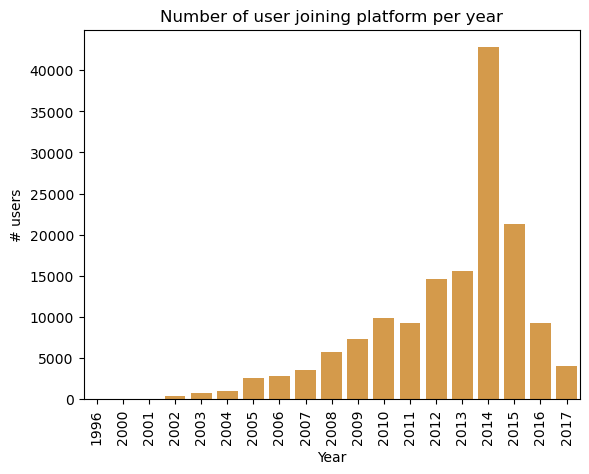

In [39]:
sns.countplot(BA_users, x=BA_users['joined'].dt.year, color='#eb9e34')
plt.title('Number of user joining platform per year')
plt.xlabel('Year')
plt.ylabel('# users')
plt.xticks(rotation=90)
plt.show()

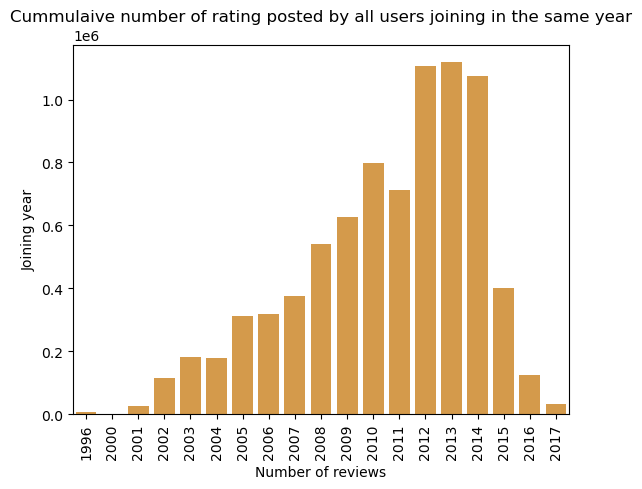

In [40]:
number_of_revievs_by_join_year = BA_users.groupby(BA_users['joined'].dt.year)['nbr_ratings'].sum()
sns.barplot(x=number_of_revievs_by_join_year.index, y=number_of_revievs_by_join_year.values, color='#eb9e34')
plt.title('Cummulaive number of rating posted by all users joining in the same year')
plt.xlabel('Number of reviews')
plt.ylabel('Joining year')
plt.xticks(rotation=90)
plt.show()

#### d. Ratings

In [41]:
BA_ratings_with_groups_and_users.describe()

,beer_id,brewery_id,abv,date,appearance,aroma,palate,taste,overall,rating,year,user_joined,total_user_nbr_ratings
count,4.489635e+06,4.489635e+06,4.489635e+06,4489635,4.489635e+06,4.489635e+06,4.489635e+06,4.489635e+06,4.489635e+06,4.489635e+06,4.489635e+06,4489635,4.489635e+06
mean,7.911186e+04,1.037520e+04,7.294480e+00,2013-07-01 20:52:28.541741056,3.939278e+00,3.871980e+00,3.868455e+00,3.906621e+00,3.903030e+00,3.896983e+00,2.013031e+03,2010-07-23 05:06:23.359003392,1.381421e+03
min,5.000000e+00,1.000000e+00,1.000000e-02,1996-08-22 10:00:00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.996000e+03,1996-08-23 10:00:00,1.000000e+00
25%,1.154200e+04,2.030000e+02,5.500000e+00,2011-02-08 11:00:00,3.750000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.620000e+00,2.011000e+03,2007-10-28 11:00:00,2.370000e+02
50%,5.688000e+04,1.199000e+03,6.800000e+00,2015-03-04 11:00:00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.990000e+00,2.015000e+03,2010-10-30 10:00:00,7.490000e+02
75%,1.259260e+05,2.243900e+04,8.600000e+00,2016-02-19 11:00:00,4.250000e+00,4.250000e+00,4.250000e+00,4.250000e+00,4.250000e+00,4.250000e+00,2.016000e+03,2014-01-01 11:00:00,1.779000e+03
max,2.932960e+05,4.981500e+04,6.750000e+01,2017-08-01 10:00:00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,2.017000e+03,2017-07-31 10:00:00,1.204600e+04
std,7.568659e+04,1.328293e+04,2.436737e+00,NaN,5.572811e-01,6.188636e-01,6.061377e-01,6.407802e-01,6.131690e-01,5.697082e-01,3.571125e+00,NaN,1.784707e+03


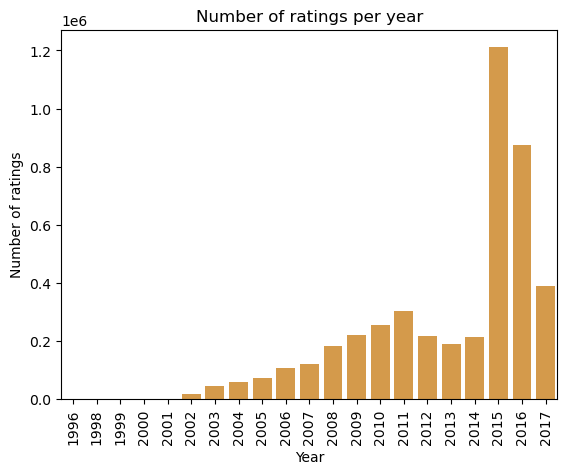

In [42]:
sns.countplot(BA_ratings_with_groups_and_users, x=BA_ratings_with_groups_and_users['date'].dt.year, color='#eb9e34')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of ratings')
plt.title('Number of ratings per year')
plt.show()

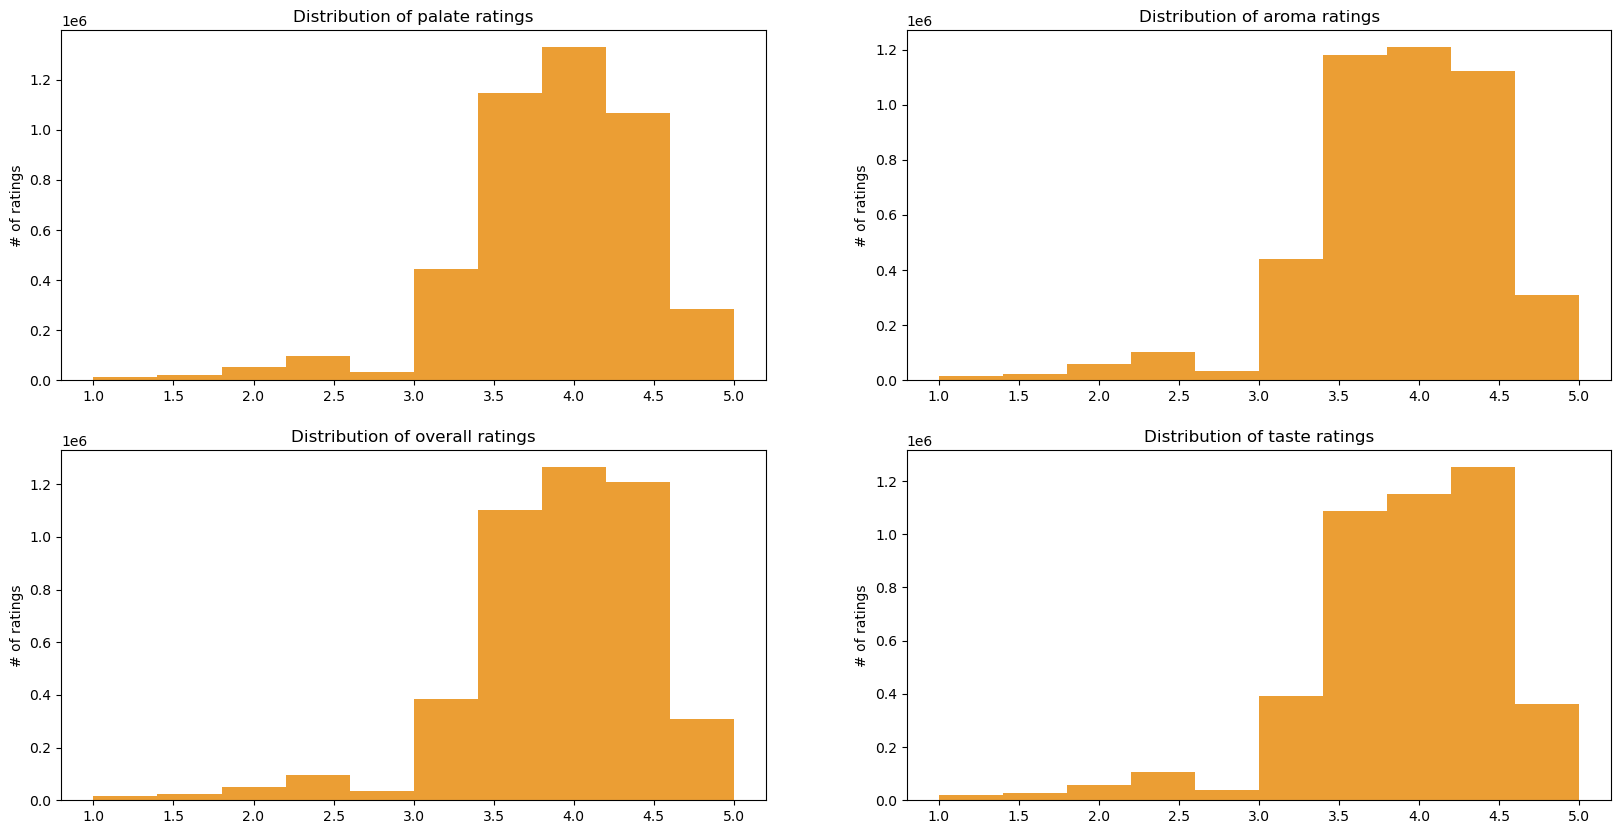

In [43]:
# plot distribution of different ratings aspects
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2, 2, 1)
plt.hist(BA_ratings_with_groups_and_users['palate'], color='#eb9e34')
plt.ylabel('# of ratings')
plt.title('Distribution of palate ratings')
plt.subplot(2, 2, 2)
plt.hist(BA_ratings_with_groups_and_users['aroma'], color='#eb9e34')
plt.ylabel('# of ratings')
plt.title('Distribution of aroma ratings')
plt.subplot(2, 2, 3)
plt.hist(BA_ratings_with_groups_and_users['overall'], color='#eb9e34')
plt.ylabel('# of ratings')
plt.title('Distribution of overall ratings')
plt.subplot(2, 2, 4)
plt.hist(BA_ratings_with_groups_and_users['taste'], color='#eb9e34')
plt.ylabel('# of ratings')
plt.title('Distribution of taste ratings')
plt.show()


The distributions of ratings for each aspect are very similar.

### 5. Research Question Analysis

In [44]:
years_groups_comparison = BA_group_breweries.groupby(['year', 'group']).nunique().loc[: , ['brewery_name']].unstack(level=1).droplevel(0, axis=1).fillna(0).astype('int')
years_groups_comparison.to_csv('group_breweries_across_years.csv')

group,Interbrew,Inbev,Ambev,AB,ABInBev,GroupoModelo,SABMiller,Heineken,Carlsberg,Asahi,Coors,Molson,MolsonCoors,Diageo
year,,,,,,,,,,,,,,
2000,33,0,4,1,0,1,11,35,41,2,2,1,0,9
2001,36,0,4,1,0,1,12,35,41,2,2,1,0,9
2002,39,0,5,1,0,1,13,37,41,2,4,1,0,9
2003,40,0,5,1,0,1,14,43,42,2,4,1,0,9
2004,0,47,0,2,0,1,14,46,43,2,4,1,0,9
2005,0,48,0,2,0,1,18,52,44,2,0,0,6,9
2006,0,49,0,2,0,1,18,52,44,2,0,0,6,9
2007,0,50,0,2,0,1,18,53,44,2,0,0,6,9
2008,0,0,0,0,50,1,18,64,43,2,0,0,6,9


Text(0.5, 1.0, 'Number of breweries owned by group')

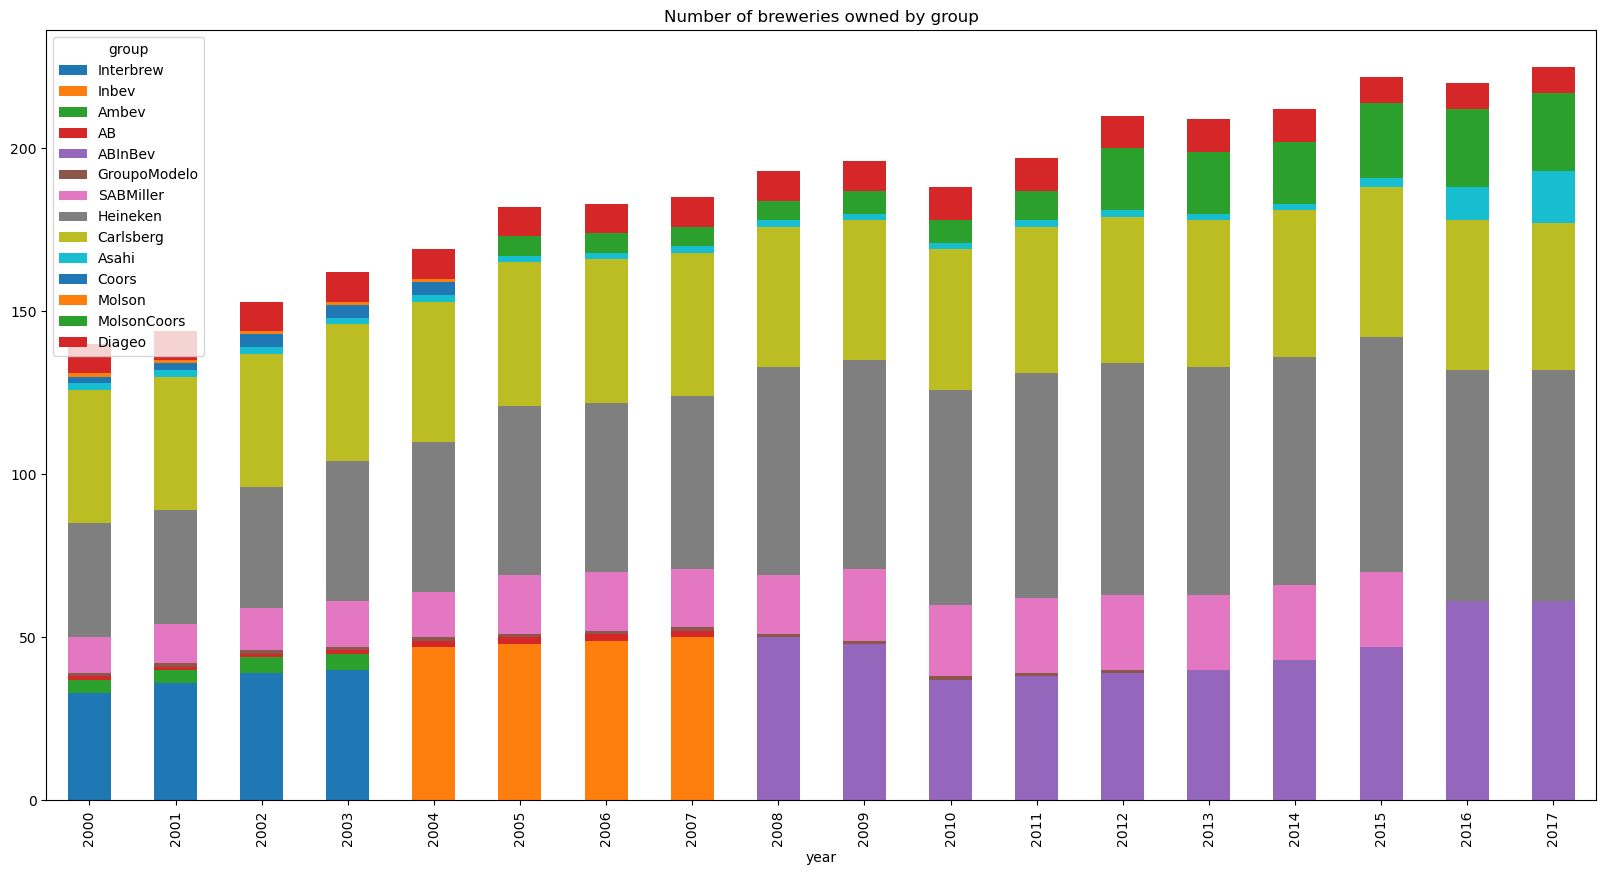

In [45]:
columns_order = ['Interbrew', 'Inbev', 'Ambev', 'AB', 'ABInBev', 'GroupoModelo', 'SABMiller', 'Heineken', 'Carlsberg', 'Asahi', 'Coors', 'Molson', 'MolsonCoors', 'Diageo']
years_groups_comparison = years_groups_comparison[columns_order]

display(years_groups_comparison)
years_groups_comparison.plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"] = (30,20)
plt.title('Number of breweries owned by group')


,beer_name
main_group,
Asahi,2545
Carslberg,11355
Diageo,15996
Heineken,52027
InBev,123917
MolsonCoors,36361
Other,4247434


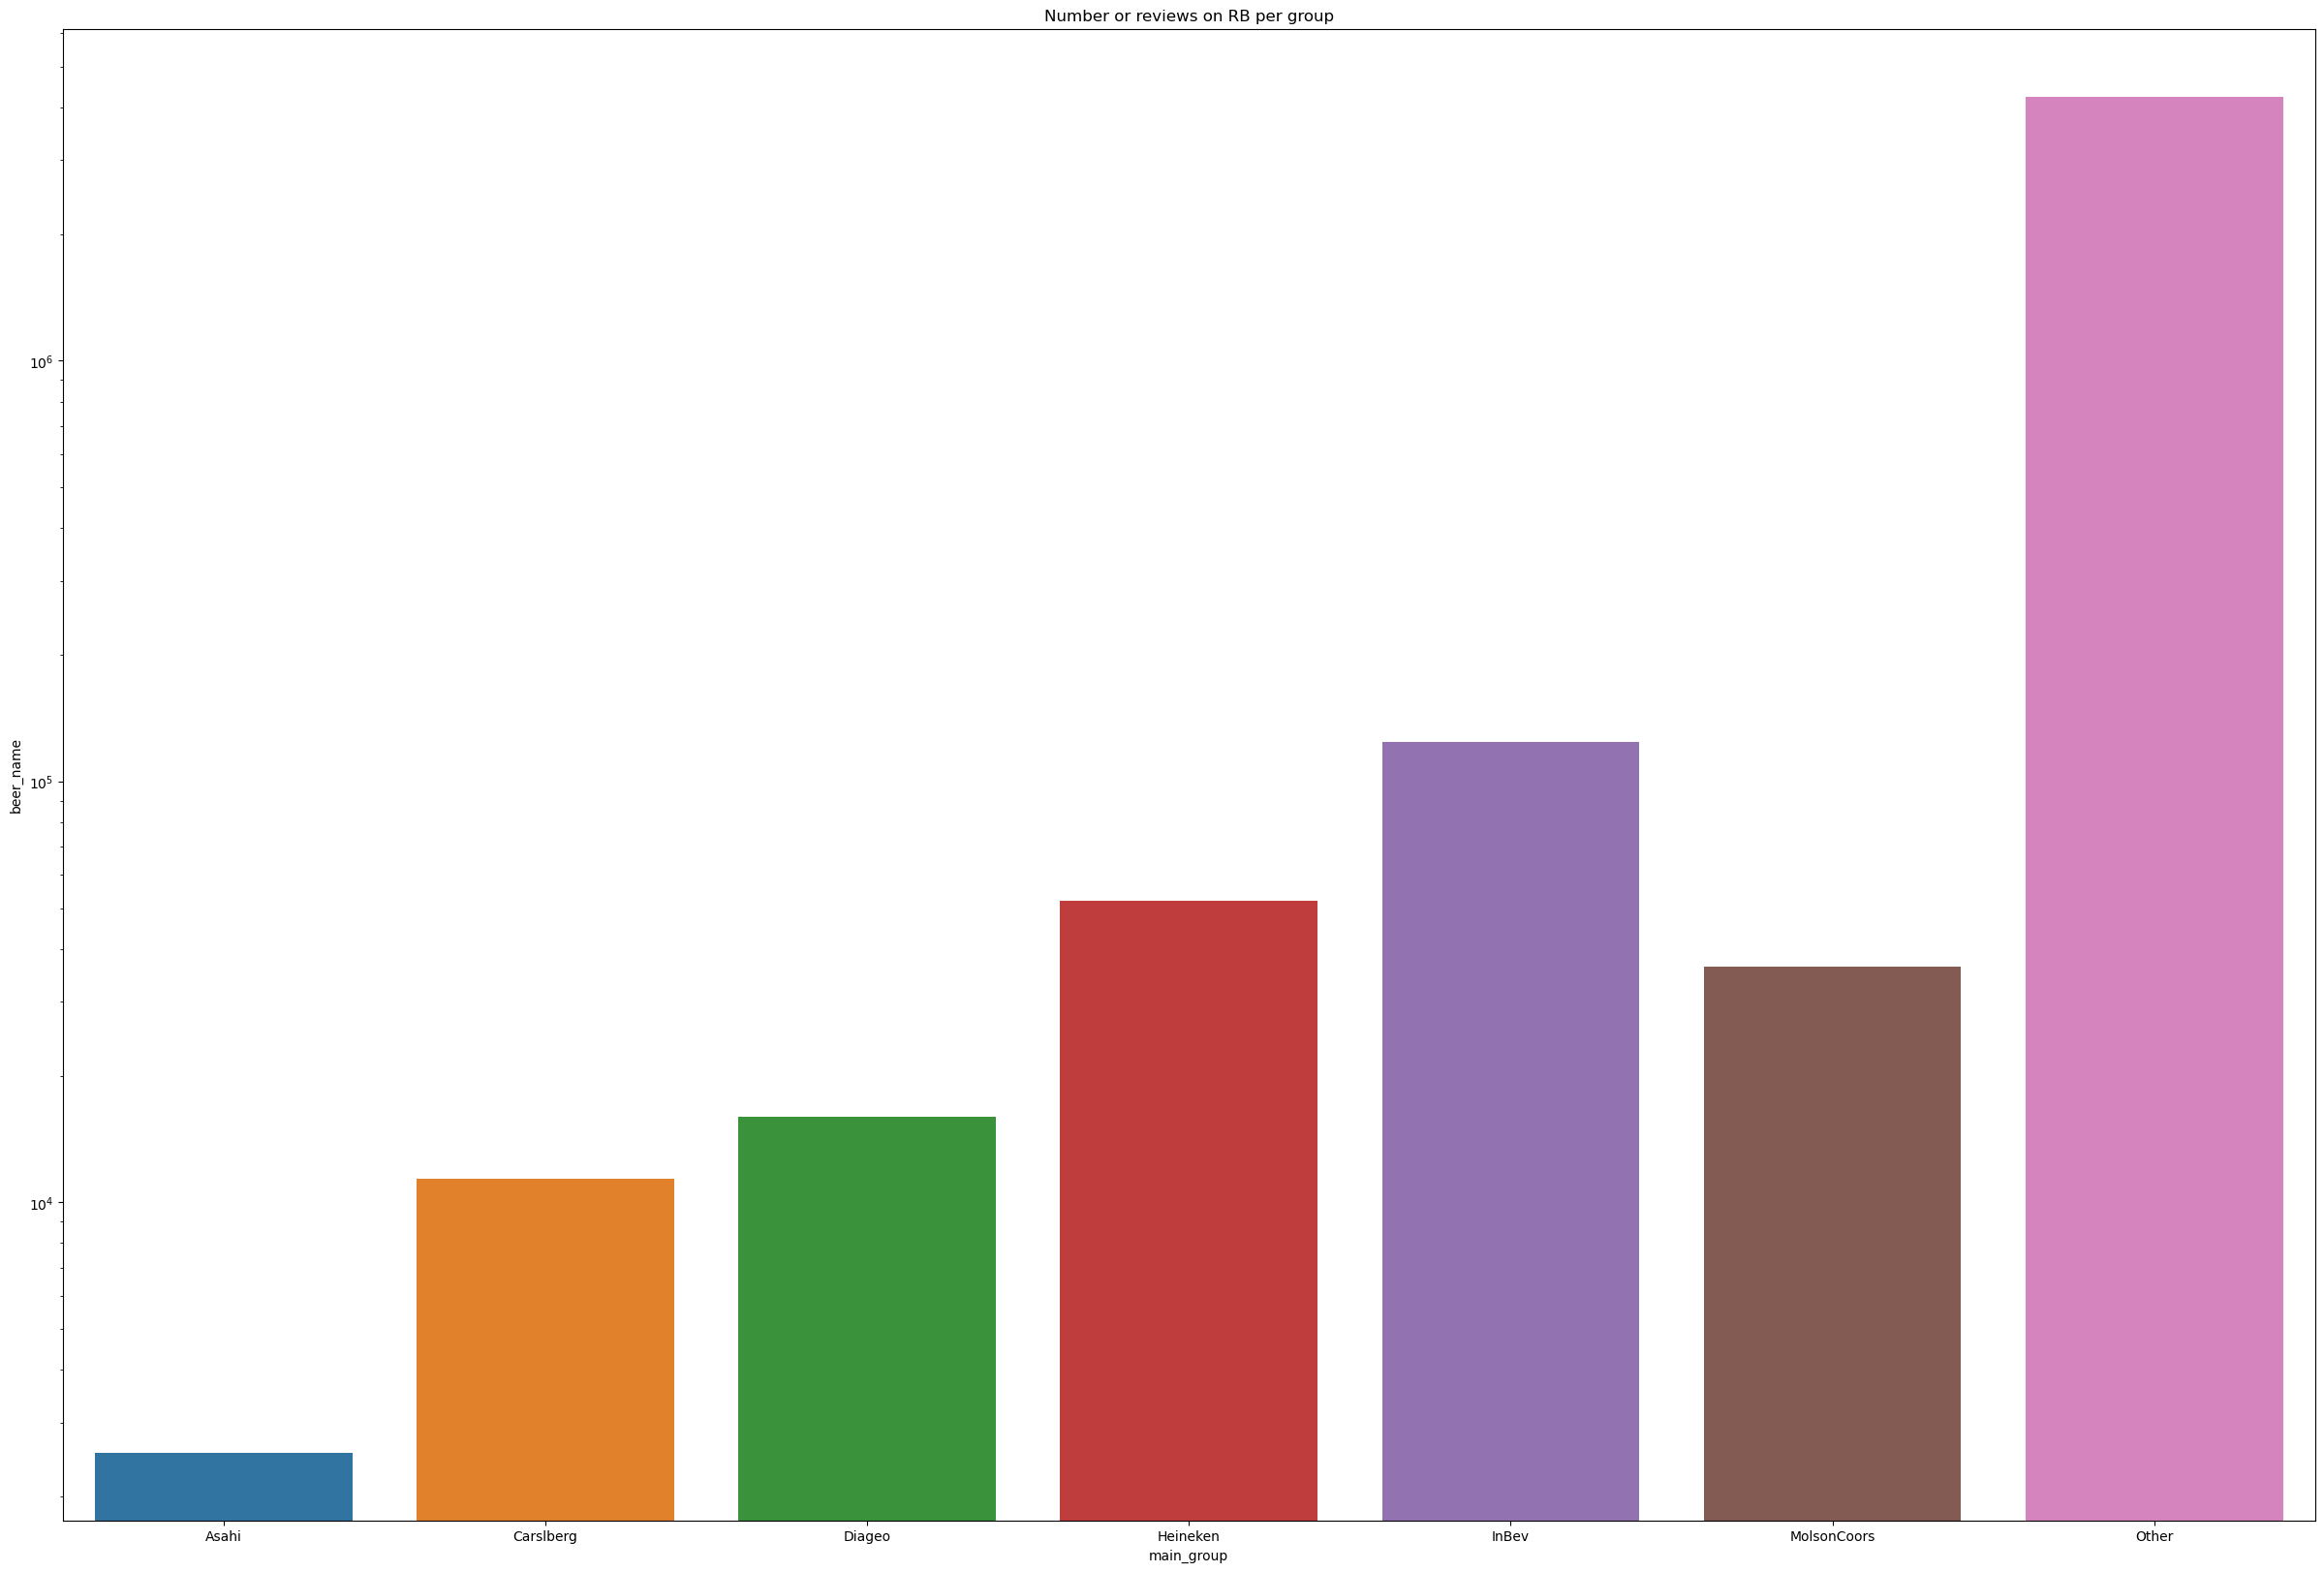

In [46]:
number_of_groups_reviews = (BA_ratings_with_groups_and_users.groupby('main_group').count()['beer_name']).to_frame()
display(number_of_groups_reviews)
sns.barplot(number_of_groups_reviews, x=number_of_groups_reviews.index, y='beer_name')
plt.rcParams["figure.figsize"] = (10,8)
plt.title('Number or reviews on RB per group')
plt.yscale('log')
number_of_groups_reviews.to_csv('nb_of_reviews.csv')

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Molson-Coors,2.414415e+09,2.429462e+09,3.776322e+09,4.000113e+09,4.305816e+09,5.506906e+09,5.844985e+09,6.190592e+09,4774300000,3032400000,3254400000,3515700000,3916500000,4206100000,4146300000,3567500000,4885000000
AB inBev,5.317204e+09,6.499492e+09,7.341600e+09,8.875440e+09,1.165248e+10,1.375408e+10,1.756656e+10,2.106780e+10,22542800000,33862000000,36297000000,39046000000,39758000000,43195000000,47063000000,43604000000,45517000000
Heineken,7.620580e+09,8.155070e+09,1.080765e+10,1.166130e+10,1.252152e+10,1.141296e+10,1.393392e+10,1.641770e+10,20046600000,21022430000,21618220000,22088670000,24265560000,26500140000,23300970000,22356990000,21831600000
Carlsberg,3.206250e+09,4.061442e+09,4.976160e+09,5.817168e+09,6.639972e+09,6.049473e+09,7.264611e+09,8.815750e+09,11329416000,11460919000,10689612000,11075274000,11831304000,12245568000,10578984000,9313038000,8828574000
Asahi,9.862151e+09,8.406746e+09,8.901297e+09,1.033324e+10,1.050740e+10,8.698677e+09,8.465451e+09,9.061463e+09,10967099900,10293897722,11458920044,11972681215,10644621421,8796864608,7866032540,8092438679,8349863201
Diageo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2480394000,3318440400,3313464000,3348279000,3641729700,3940225800,3200496000,2861119800,2321379000


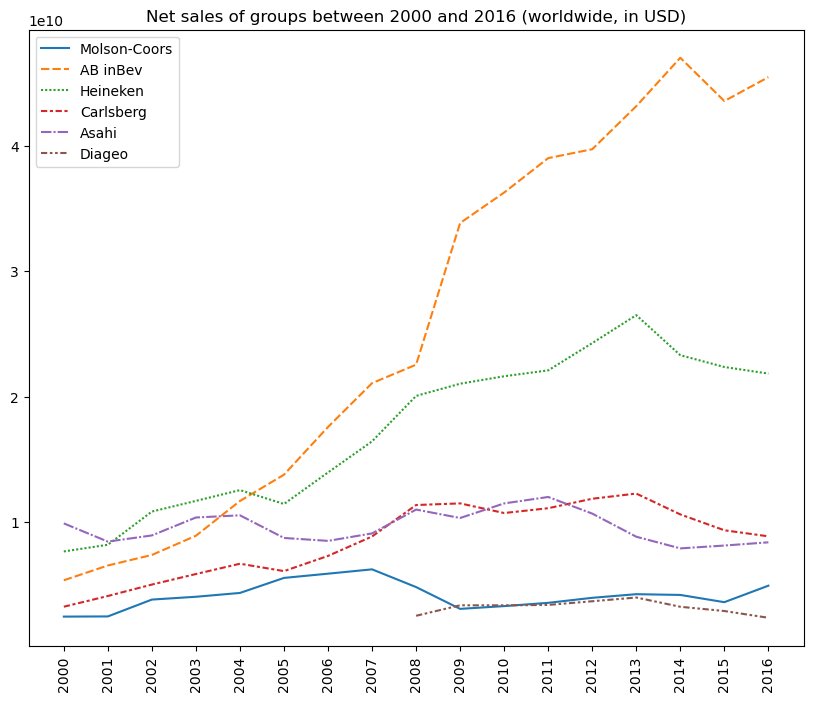

In [47]:
financial_results_df = pd.read_csv('./data/finacial_results(USD).csv', header=0, index_col=0)
display(financial_results_df)

sns.lineplot(data=financial_results_df.T)
plt.title('Net sales of groups between 2000 and 2016 (worldwide, in USD)')
plt.xticks(rotation=90)
plt.show()

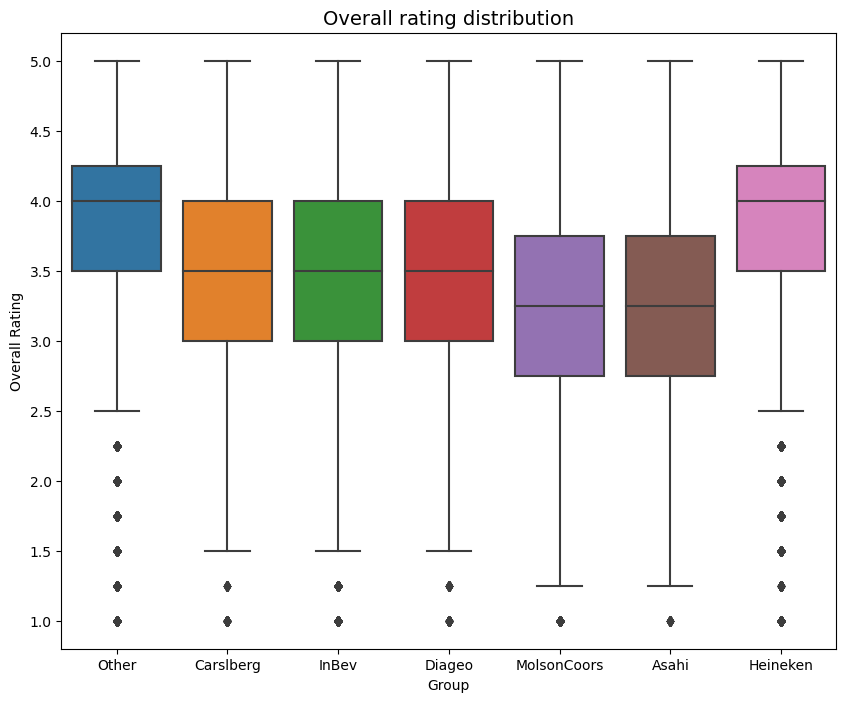

In [48]:
ax = sns.boxplot(x="main_group", y="overall", data=BA_ratings_with_groups_and_users)
plt.title('Overall rating distribution', size = 14)
plt.ylabel('Overall Rating')
plt.xlabel('Group')
plt.show()

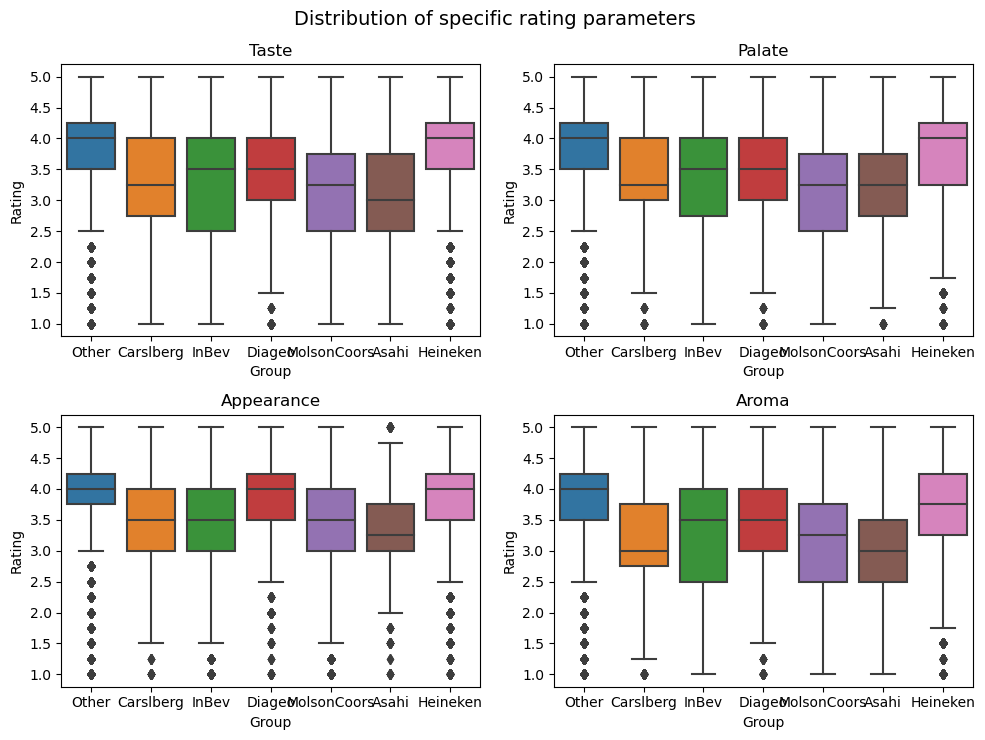

In [49]:
# Plot per group distribution of ratings parameters (Unmatched Data)
plt.rcParams["figure.figsize"] = (10,7.5)
plt.suptitle('Distribution of specific rating parameters', size=14)
plt.subplot(2, 2, 1)
sns.boxplot(x="main_group", y="taste", data=BA_ratings_with_groups_and_users)
plt.ylabel('Rating')
plt.xlabel('Group')
plt.title('Taste')
plt.subplot(2, 2, 2)
sns.boxplot(x="main_group", y="palate", data=BA_ratings_with_groups_and_users)
plt.ylabel('Rating')
plt.xlabel('Group')
plt.title('Palate')
plt.subplot(2, 2, 3)
sns.boxplot(x="main_group", y="appearance", data=BA_ratings_with_groups_and_users)
plt.ylabel('Rating')
plt.xlabel('Group')
plt.title('Appearance')
plt.subplot(2, 2, 4)
sns.boxplot(x="main_group", y="aroma", data=BA_ratings_with_groups_and_users)
plt.ylabel('Rating')
plt.xlabel('Group')
plt.title('Aroma')
plt.tight_layout()



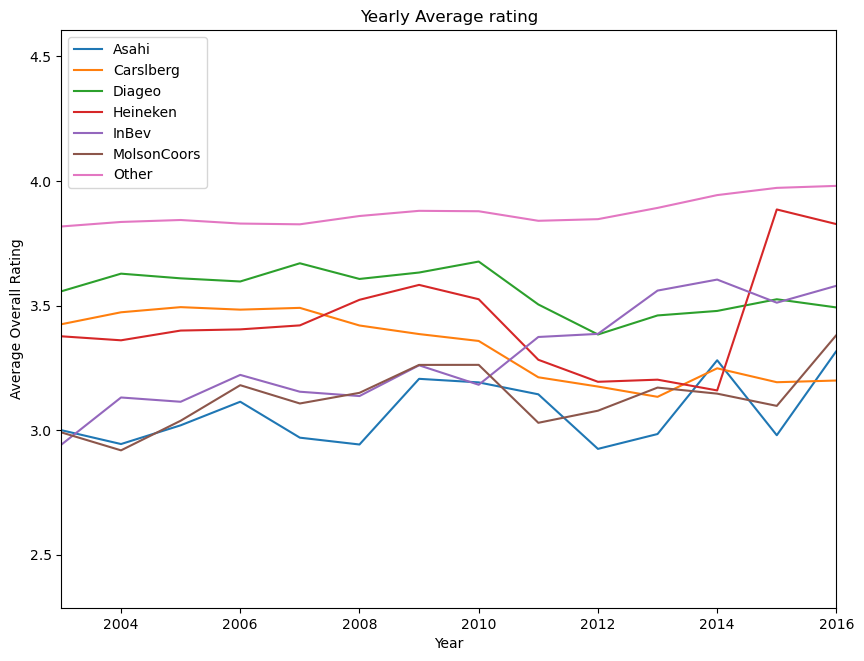

In [50]:
# Plotting yearly average overall rating per company group 

yearly = BA_ratings_with_groups_and_users.groupby(['main_group', 'year'])[['overall'] ].mean().reset_index()

for group in yearly['main_group'].unique():
    plt.plot('year', 'overall', data= yearly[yearly['main_group']== group])
    
plt.legend(yearly['main_group'].unique())
plt.title('Yearly Average rating')
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.xlim(right = 2016, left = 2003)



yearly2 = BA_ratings_with_groups_and_users.groupby(['main_group', 'year'])[['overall'] ].count().reset_index()

In [25]:
# Running an OLS regresssion to detangle any correlation of 'overall' rating with other parameters

mod = smf.ols(formula='overall ~ C(main_group)  + taste * C(main_group)  + appearance * C(main_group) + aroma * C(main_group) + abv * C(main_group) + palate * C(main_group)',
              data=BA_ratings_with_groups_and_users)


res = mod.fit()

print(res.summary())


: 

In [28]:
# Dictionary with mapping of beer substyles to major beer families in BA 

beer_style_mapping = {
"Bocks": ["Bock", "Doppelbock", "Eisbock", "Maibock", "Weizenbock"],
"Brown Ales": ["Altbier", "American Brown Ale", "Belgian Dark Ale", "English Brown Ale", "English Dark Mild Ale"],
"Dark Ales": ["Dubbel", "Roggenbier", "Scottish Ale", "Winter Warmer"],
"Dark Lagers": ["American Amber / Red Lager", "Czech Amber Lager", "Czech Dark Lager", "European Dark Lager", "Märzen", "Munich Dunkel","Euro Dark Lager", "Rauchbier", "Schwarzbier", "Vienna Lager"],
"Hybrid Beers": ["Bière de Champagne / Bière Brut", "Braggot", "California Common / Steam Beer", "Cream Ale"],
"India Pale Ales": ["American IPA", "Belgian IPA", "Black IPA", "Brut IPA", "English IPA", "Imperial IPA", "Milkshake IPA", "New England IPA"],
"Pale Ales": ["American Amber / Red Ale", "American Blonde Ale", "American Pale Ale", "Belgian Blonde Ale", "Belgian Pale Ale", "Bière de Garde", "English Bitter", "English Pale Ale", "English Pale Mild Ale", "Extra Special / Strong Bitter (ESB)", "Grisette", "Irish Red Ale", "Kölsch", "Saison"],
"Pale Lagers": ["American Adjunct Lager","Dortmunder / Export Lager", "Euro Strong Lager", "American Pale Lager", "Czech Pilsener", "German Pilsener", "American Lager", "Bohemian / Czech Pilsner", "Czech Pale Lager", "European / Dortmunder Export Lager", "European Pale Lager","Euro Pale Lager", "European Strong Lager", "Festbier / Wiesnbier", "German Pilsner", "Helles", "Imperial Pilsner", "India Pale Lager (IPL)", "Kellerbier / Zwickelbier", "Light Lager", "Malt Liquor"],
"Porters": ["American Porter", "Baltic Porter", "English Porter", "Imperial Porter", "Robust Porter", "Smoked Porter"],
"Specialty Beers": ["Chile Beer","American Black Ale","Black & Tan", "Pumpkin Ale", "Herbed / Spiced Beer","Low Alcohol Beer", "Fruit / Vegetable Beer", "Fruit and Field Beer", "Gruit / Ancient Herbed Ale", "Happoshu", "Herb and Spice Beer", "Japanese Rice Lager", "Kvass", "Low-Alcohol Beer", "Pumpkin Beer", "Rye Beer", "Sahti", "Smoked Beer"],
"Stouts": ["American Imperial Stout","Milk / Sweet Stout","American Double / Imperial Stout", "American Stout", "English Stout", "Foreign / Export Stout", "Irish Dry Stout", "Oatmeal Stout", "Russian Imperial Stout", "Sweet / Milk Stout"],
"Strong Ales": ["American Barleywine","Belgian Strong Pale Ale","Belgian Strong Dark Ale", "American Strong Ale", "Belgian Dark Strong Ale", "Belgian Pale Strong Ale", "English Barleywine", "English Strong Ale", "Imperial Red Ale", "Old Ale", "Quadrupel (Quad)", "Scotch Ale / Wee Heavy", "Tripel", "Wheatwine"],
"Wheat Beers": ["American Dark Wheat Beer","American Pale Wheat Ale", "American Dark Wheat Ale", "Kristalweizen", "American Pale Wheat Beer", "Dunkelweizen", "Grodziskie", "Hefeweizen", "Kristallweizen", "Witbier"],
"Wild/Sour Beers": ["Berliner Weisse","Berliner Weissbier", "Brett Beer", "Faro", "Flanders Oud Bruin", "Flanders Red Ale", "Fruit Lambic", "Fruited Kettle Sour", "Gose", "Gueuze", "Lambic", "Wild Ale"]
}

restructured_dict = {style: family for family, style in beer_style_mapping.items() for style in style} # Inversing keys and values 


# Mapping beer styles to beer famillies

BA_ratings_with_groups_and_users['beer_family'] = BA_ratings_with_groups_and_users['style'].apply(lambda style: me.map_style_to_family(style, restructured_dict))

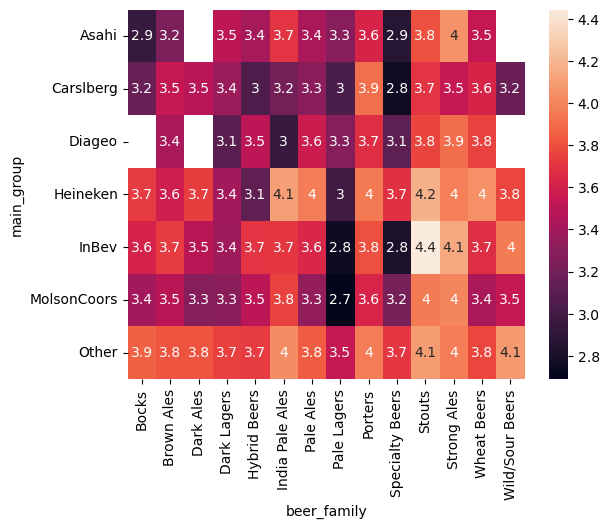

In [29]:
# Average rating of style of beers owned by the different groups

avg_rating_group_beerfamily = BA_ratings_with_groups_and_users.groupby(['main_group', 'beer_family'])['overall'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False).reset_index()
avg_rating_group_beerfamily = avg_rating_group_beerfamily.pivot(index= 'main_group', columns= 'beer_family', values='mean')
ax = sns.heatmap(avg_rating_group_beerfamily, annot=True ) # Plot


In [30]:
# Top 15 rated beers (with over 100 ratings)

beers = BA_ratings_with_groups_and_users.groupby(['main_group', 'beer_name', 'beer_family'])['overall'].agg(['count', 'mean', 'std']).sort_values('count', ascending=False).reset_index()
beers = beers[beers['count'] > 100] 
beers.sort_values('mean', ascending= False).head(15)


,main_group,beer_name,beer_family,count,mean,std
2646,Other,Kentucky Brunch Brand Stout,Stouts,312,4.836538,0.339228
738,Other,Good Morning,Stouts,860,4.786628,0.258096
2152,Other,King JJJuliusss,India Pale Ales,373,4.745979,0.308891
1452,Other,Barrel-Aged Abraxas,Stouts,518,4.745656,0.286892
3771,Other,ManBearPig,Stouts,222,4.740991,0.447375
1192,Other,Very Hazy,India Pale Ales,605,4.740083,0.282463
948,Other,King Julius,India Pale Ales,719,4.737135,0.297256
1331,Other,Hunahpu's Imperial Stout - Double Barrel Aged,Stouts,559,4.720036,0.337170
5243,Other,Drie Fonteinen Zenne Y Frontera,Wild/Sour Beers,157,4.714968,0.260144
6119,Other,Derivation Blend #1 (Maple Syrup Bourbon Barrel),Stouts,133,4.710526,0.386616


In [31]:
# Top 3 rated beers per company group (With over 100 ratings)

beers.groupby('main_group', as_index=False).apply(lambda x: x.nlargest(3, 'mean')).reset_index(drop=True)


,main_group,beer_name,beer_family,count,mean,std
0,Asahi,Pilsner Urquell,Pale Lagers,375,3.648667,0.544232
1,Asahi,Asahi Black (Kuronama),Dark Lagers,174,3.573276,0.537621
2,Asahi,Grolsch Premium Lager,Pale Lagers,125,3.200000,0.606584
3,Carslberg,"Carnegie Porter 5,5%",Porters,399,4.177945,0.504044
4,Carslberg,Sinebrychoff Porter,Porters,660,4.167803,0.513997
5,Carslberg,Okocim Porter,Porters,462,4.067641,0.596126
6,Diageo,Guinness Special Export Stout / Antwerpen Stout,Stouts,348,4.102011,0.415838
7,Diageo,Guinness Foreign Extra Stout,Stouts,1068,4.076779,0.494657
8,Diageo,West Indies Porter,Porters,193,3.799223,0.424095
9,Heineken,High West-ified Imperial Coffee Stout,Stouts,1855,4.372507,0.291670


In [32]:
# Top 3 most rated beers per company group (With more than 100 ratings)


beers.groupby('main_group', as_index=False).apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


,main_group,beer_name,beer_family,count,mean,std
0,Asahi,Asahi Super Dry,Specialty Beers,766,2.868473,0.693043
1,Asahi,Pilsner Urquell,Pale Lagers,375,3.648667,0.544232
2,Asahi,Peroni Nastro Azzurro,Pale Lagers,187,2.945187,0.670522
3,Carslberg,Carlsberg Beer,Pale Lagers,775,3.150000,0.687184
4,Carslberg,Kronenbourg 1664,Pale Lagers,766,3.283616,0.696932
5,Carslberg,Sinebrychoff Porter,Porters,660,4.167803,0.513997
6,Diageo,Guinness Draught,Stouts,3471,3.712691,0.765012
7,Diageo,Guinness Extra Stout (Original),Stouts,1930,3.763083,0.626333
8,Diageo,Guinness Foreign Extra Stout,Stouts,1068,4.076779,0.494657
9,Heineken,Newcastle Brown Ale,Brown Ales,2149,3.481270,0.701798


#### User matched ratings

In [33]:
# Matching big and small beer reviews with user_id

# Filter out users that have not rated both big and small beers

'''ratings_2 = ba_ratings.groupby('user_id').filter(lambda x: set(x['size']) == {'Big', 'Small'})
'''
# Create a new DataFrame for matched reviews

'''matched_reviews_list = []


for user_id in ratings_2['user_id'].unique():
    user_reviews = ratings_2[ratings_2['user_id'] == user_id]
    big_reviews = user_reviews[user_reviews['size'] == 'Big']
    small_reviews = user_reviews[user_reviews['size'] == 'Small']

    # Ensure there are reviews to sample from
    if not big_reviews.empty and not small_reviews.empty:
        min_reviews = min(len(big_reviews), len(small_reviews))
        matched_big = big_reviews.sample(min_reviews)
        matched_small = small_reviews.sample(min_reviews)

        # Append matched reviews to the list
        matched_reviews_list.append(matched_big)
        matched_reviews_list.append(matched_small)

# Check if there are matched reviews to concatenate
if matched_reviews_list:
    # Concatenate all matched reviews into a single DataFrame
    matched_reviews = pd.concat(matched_reviews_list, ignore_index=True)
else:
    # Handle the case where no matching reviews are found
    matched_reviews = pd.DataFrame(columns=ratings_2.columns)
    print("No matching reviews found.")
'''

matched_reviews = pd.read_csv('matched_user_reviews.csv')

    


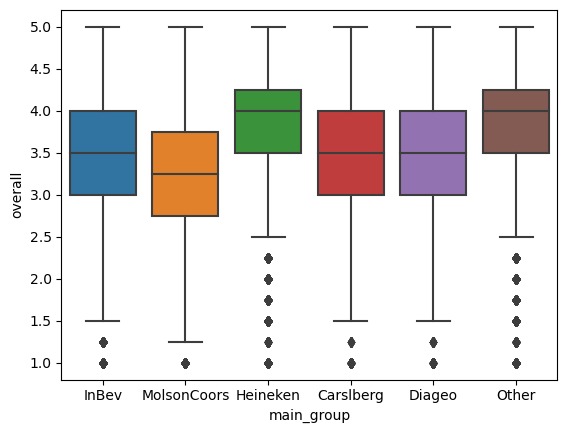

In [34]:
# Plotting overall rating per group (WITH USER MATCHING)

ax = sns.boxplot(x="main_group", y="overall", data=matched_reviews)


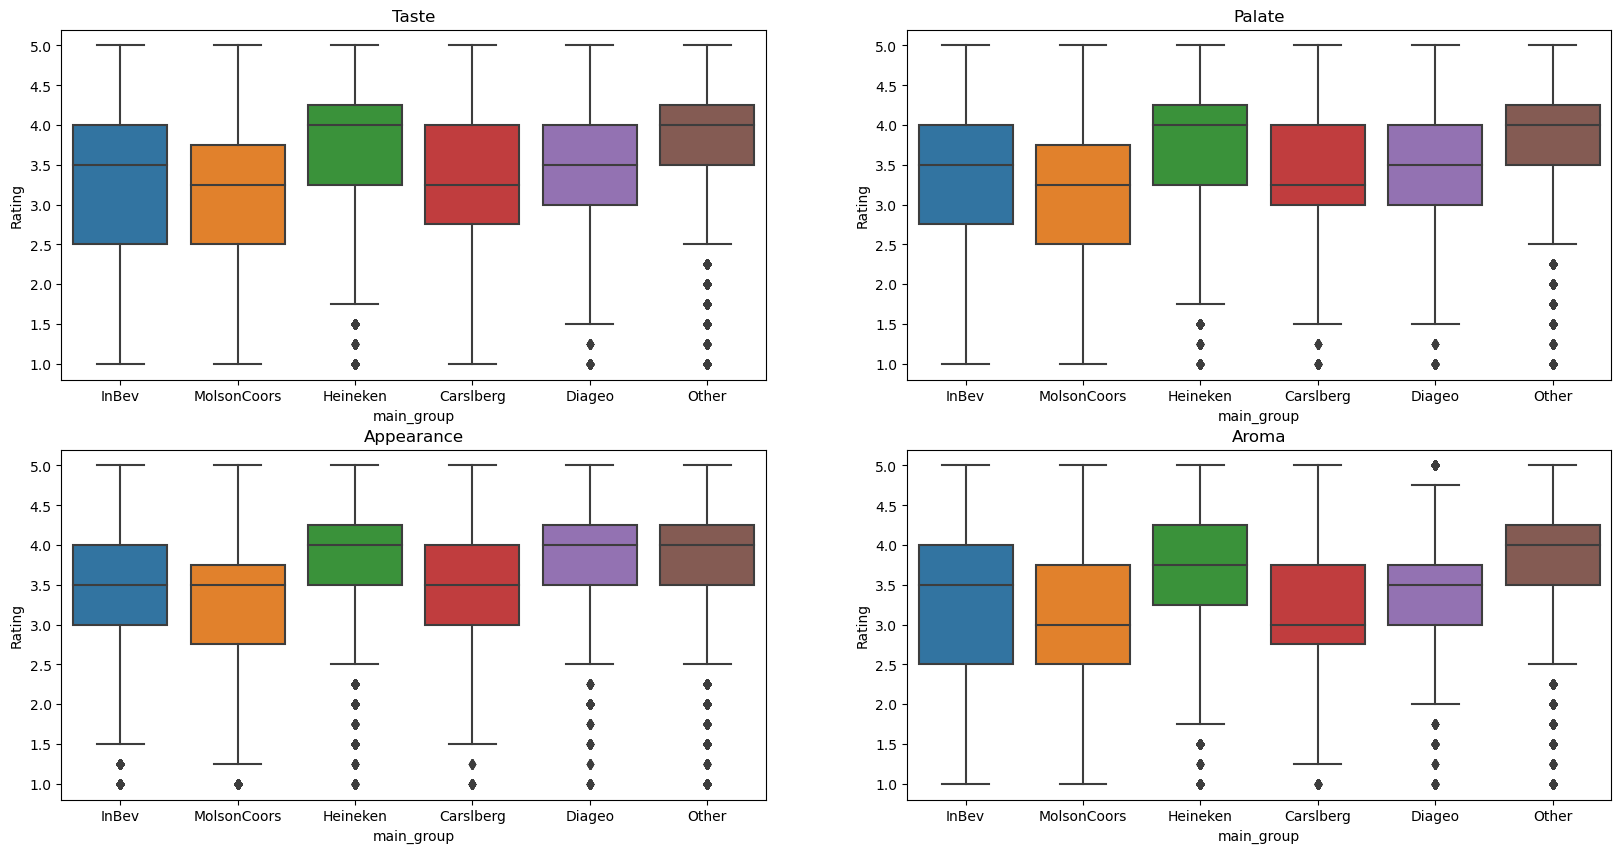

In [35]:
# Plot per group distribution of ratings parameters (Matched Data)

plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2, 2, 1)
sns.boxplot(x="main_group", y="taste", data=matched_reviews)
plt.ylabel('Rating')
plt.title('Taste')
plt.subplot(2, 2, 2)
sns.boxplot(x="main_group", y="palate", data=matched_reviews)
plt.ylabel('Rating')
plt.title('Palate')
plt.subplot(2, 2, 3)
sns.boxplot(x="main_group", y="appearance", data=matched_reviews)
plt.ylabel('Rating')
plt.title('Appearance')
plt.subplot(2, 2, 4)
sns.boxplot(x="main_group", y="aroma", data=matched_reviews)
plt.ylabel('Rating')
plt.title('Aroma')
plt.show()



#### Big vs Small (Matched Data on Users)

Text(0, 0.5, 'Rating')

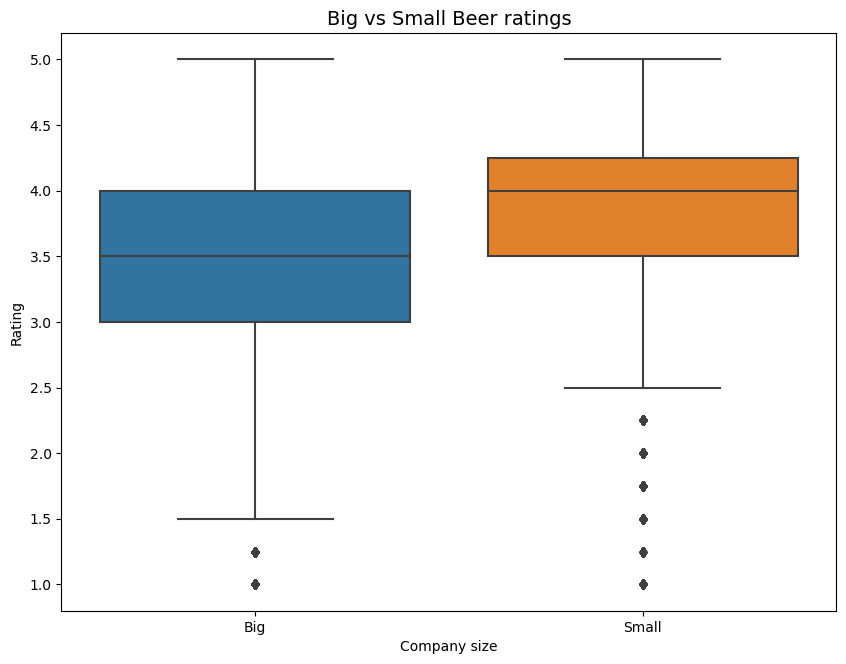

In [36]:
# Plotting overall rating per beer company size (WITH USER MATCHING)
plt.rcParams["figure.figsize"] = (10,7.5)


ax = sns.boxplot(x="size", y="overall", data=matched_reviews)
plt.title('Big vs Small Beer ratings', size = 14)
plt.xlabel('Company size')
plt.ylabel('Rating')



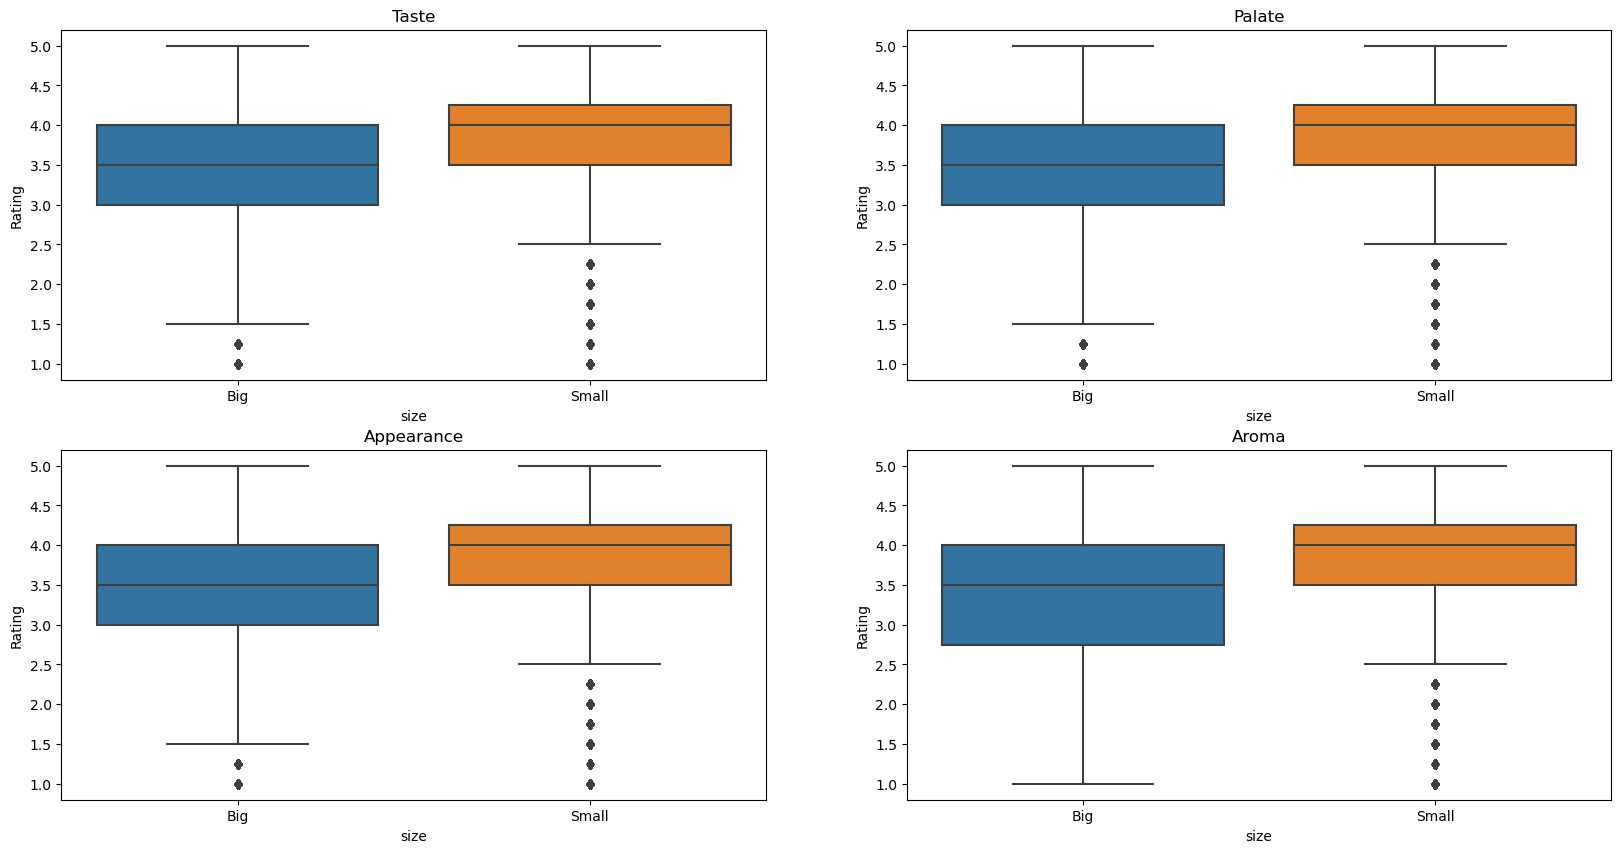

In [37]:
# Plot per group distribution of ratings parameters (WITH USER MATCHING)

plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2, 2, 1)
sns.boxplot(x="size", y="taste", data=matched_reviews)
plt.ylabel('Rating')
plt.title('Taste')
plt.subplot(2, 2, 2)
sns.boxplot(x="size", y="palate", data=matched_reviews)
plt.ylabel('Rating')
plt.title('Palate')
plt.subplot(2, 2, 3)
sns.boxplot(x="size", y="appearance", data=matched_reviews)
plt.ylabel('Rating')
plt.title('Appearance')
plt.subplot(2, 2, 4)
sns.boxplot(x="size", y="aroma", data=matched_reviews)
plt.ylabel('Rating')
plt.title('Aroma')
plt.show()



In [38]:
# Running a t-test to check if difference is relevant

from scipy.stats import ttest_rel, ttest_ind

big_beer_reviews = matched_reviews[matched_reviews['size']== 'Big']['overall'].values
small_beer_reviews = matched_reviews[matched_reviews['size']== 'Small']['overall'].values


ttest_rel(big_beer_reviews,small_beer_reviews)



TtestResult(statistic=-177.97360979112352, pvalue=0.0, df=450538.0)

This shows that we can reject the null hypothesis, and conclude that small beers are better rated.

#### Matched data on ABV and style 

In [40]:
matched_abv_style = pd.read_pickle(BA_FOLDER + 'matched_BA')

matched_abv_style['size'] = 'Big'
matched_abv_style['size'][matched_abv_style['main_group']== 'Other'] = 'Small'


/tmp/ipykernel_9496/1103777798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_abv_style['size'][matched_abv_style['main_group']== 'Other'] = 'Small'


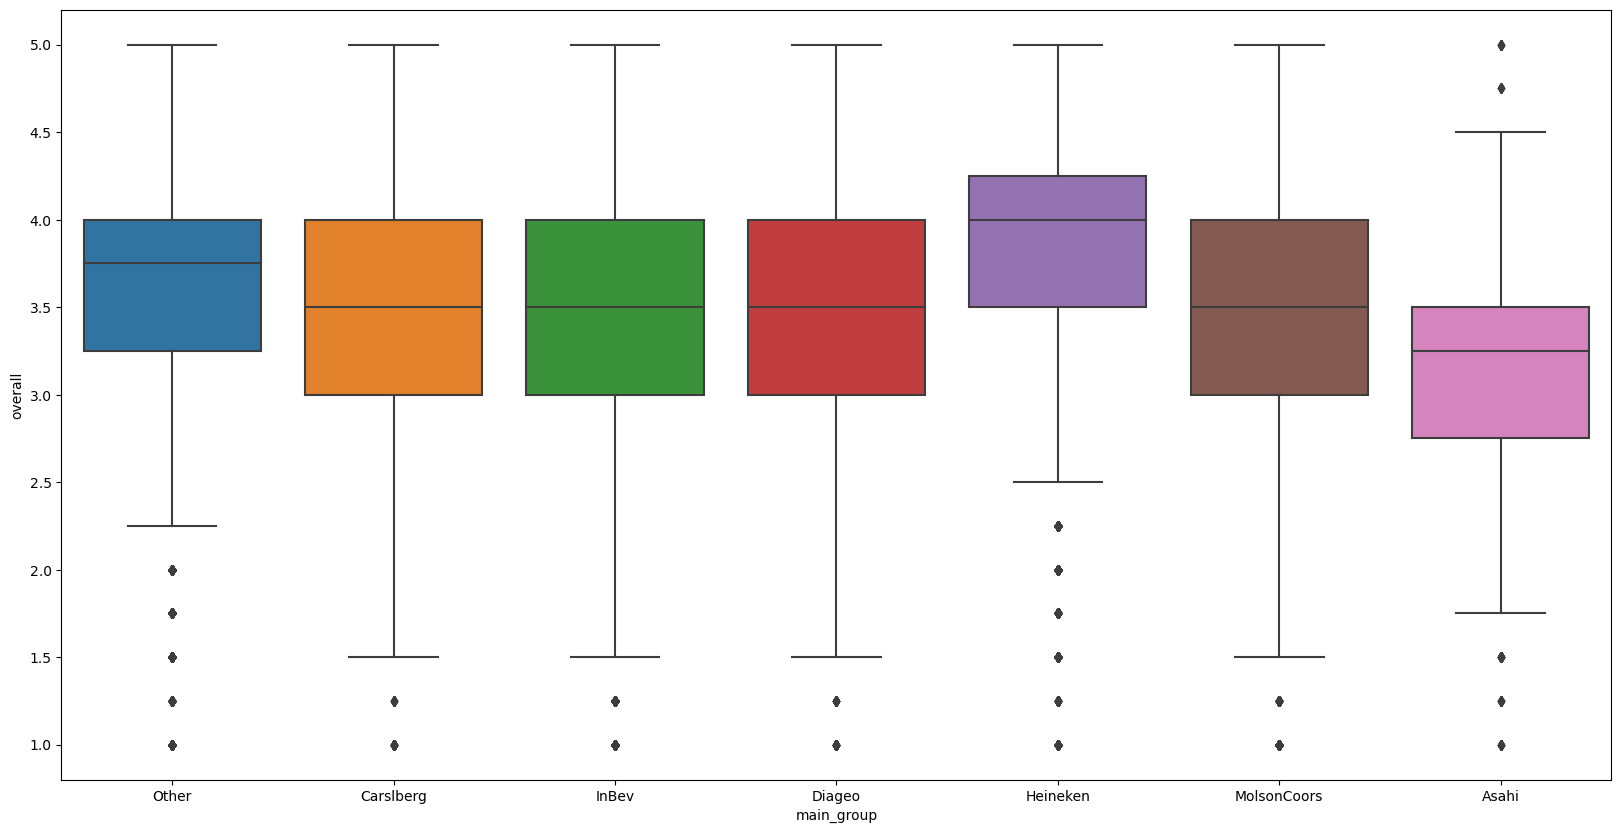

In [41]:
ax = sns.boxplot(x="main_group", y="overall", data=matched_abv_style)


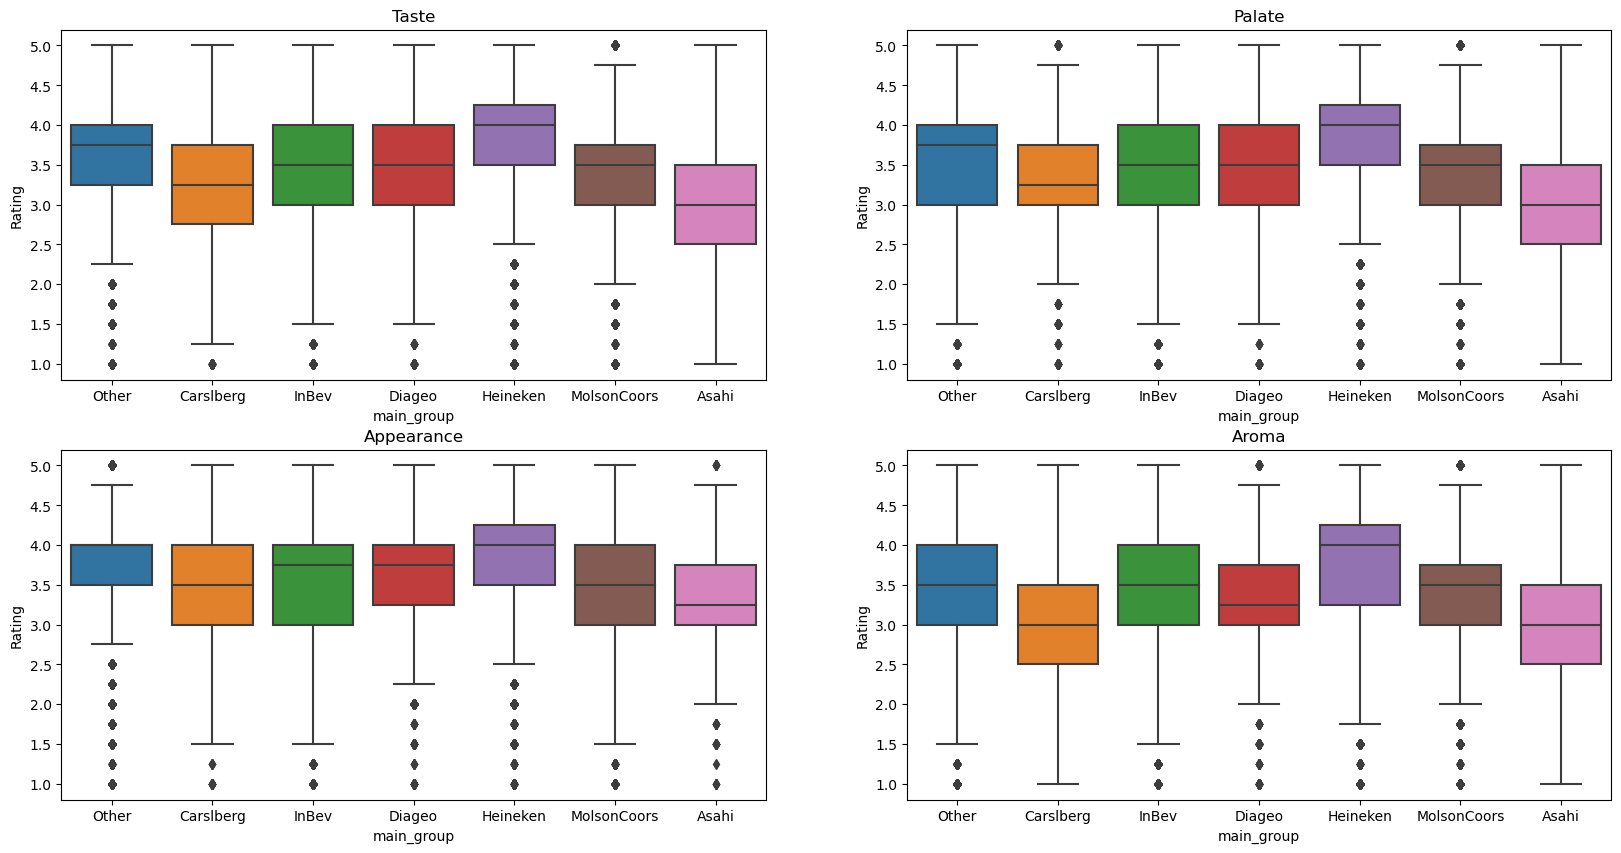

In [44]:
# plot distribution of different ratings aspects

plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2, 2, 1)
sns.boxplot(x="main_group", y="taste", data=matched_abv_style)
plt.ylabel('Rating')
plt.title('Taste')
plt.subplot(2, 2, 2)
sns.boxplot(x="main_group", y="palate", data=matched_abv_style)
plt.ylabel('Rating')
plt.title('Palate')
plt.subplot(2, 2, 3)
sns.boxplot(x="main_group", y="appearance", data=matched_abv_style)
plt.ylabel('Rating')
plt.title('Appearance')
plt.subplot(2, 2, 4)
sns.boxplot(x="main_group", y="aroma", data=matched_abv_style)
plt.ylabel('Rating')
plt.title('Aroma')
plt.show()



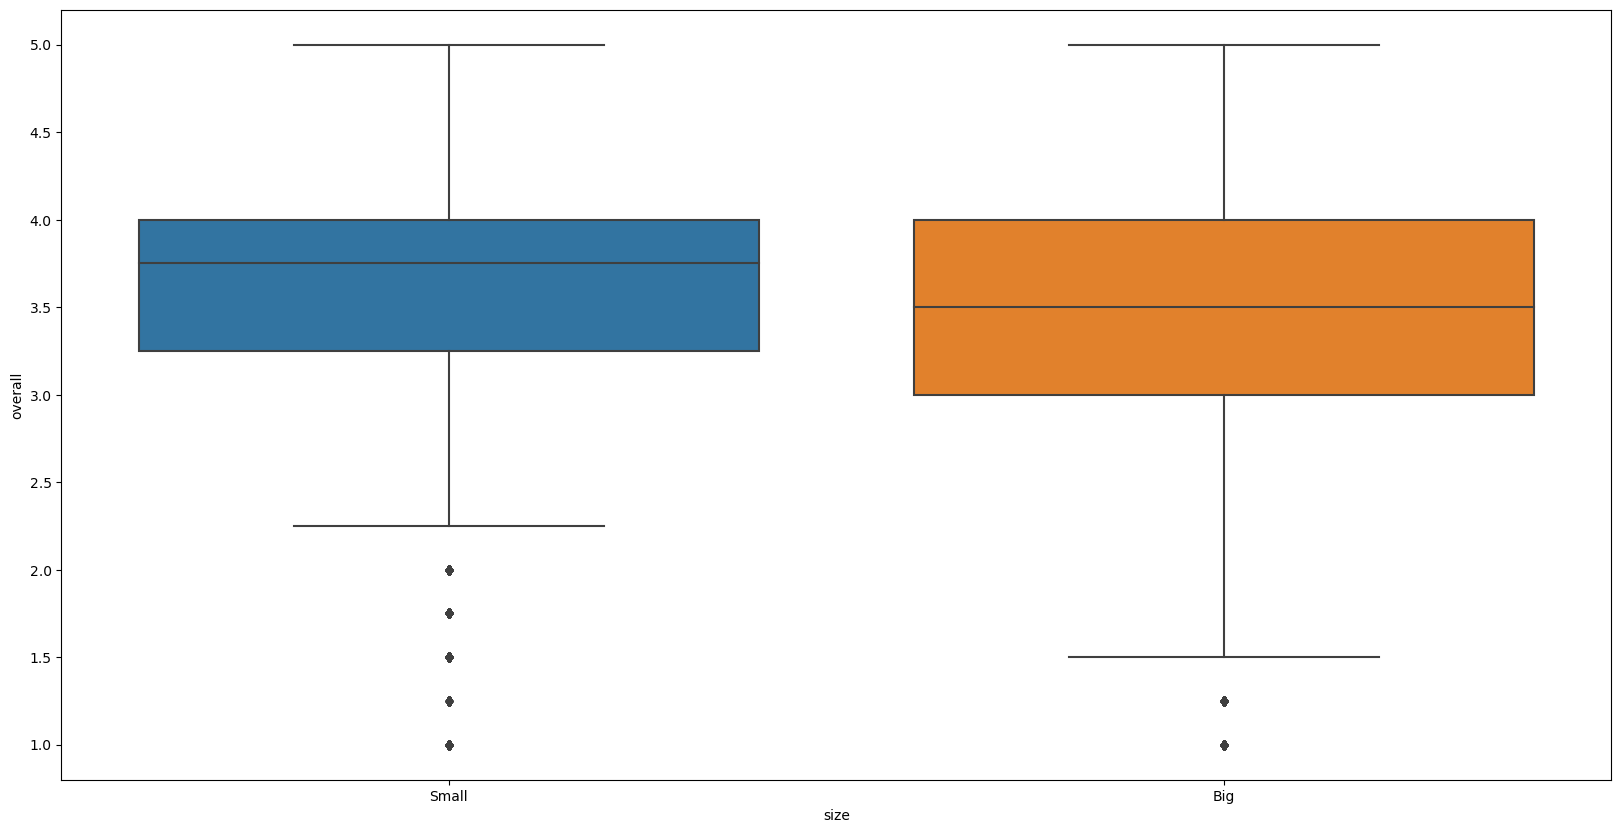

In [45]:
ax = sns.boxplot(x="size", y="overall", data=matched_abv_style)


In [ ]:
#We do another t-test with this matching

big_beer_reviews_2 = matched_reviews[matched_reviews['size']== 'Big']['overall'].values
small_beer_reviews_2 = matched_reviews[matched_reviews['size']== 'Small']['overall'].values


ttest_rel(big_beer_reviews_2,small_beer_reviews_2, alternative = 'less' )

Results are quite striking here as well!